In [ ]:
from Distributed_Agent import Functions
from Distributed_Agent import Analysis

from openpyxl import Workbook
import importlib

In [ ]:
N = 100                                 # Number of agents
L = 45                                  # The length of the simulation box
Alphas = [-0.5, +0.3, 1.0, -1000]       # Hamiltonian constant coefficients
learning_rate = 1e-5                    # Learning rate in model training
discount_rate = 0.98                    # The effect of future decisions on current decisions
batch_size    = 20                      # Selected package of replay_memory to perform training
steps_per_train = 10                    # The training function is called once every ... steps
Parameters = [N, L, Alphas, learning_rate, discount_rate, batch_size, steps_per_train]

requesting = True                       # Enable the sending request function
moving     = True                       # Enable the move function to agents
training   = True                       # Enable each agent model training function
Func_params  = [requesting, moving, training]

buildings_type = "random"               # Type of placement of buildings (random or regular)
num_buildings = 00                       # Number of buildings in environment
num_streets   = 0                        # Number of streets in environment
ENV_Parameters = [L, buildings_type, num_buildings, num_streets]

Initialize_model_path = f'./All Results/Different Model Training/models with alpha4 = {Alphas[3]}/L={L}/model_H_best_weight.keras'


for seed in range(30, 31):
    ParticleExcel = Workbook(); del ParticleExcel['Sheet']
    AveragedExcel = Workbook(); del AveragedExcel['Sheet']


    plot_env, Agents, ParticleExcel_, AveragedExcel_ = Functions.Initializer(ENV_Parameters, Parameters, Func_params, Initialize_model_path, ParticleExcel, AveragedExcel, 'Base', seed)
    Functions.base_model(plot_env, Agents, ParticleExcel_, AveragedExcel_);  print("  finish Base...")

    Func_params  = [False, moving, training]
    plot_env, Agents, ParticleExcel_, AveragedExcel_ = Functions.Initializer(ENV_Parameters, Parameters, Func_params, Initialize_model_path, ParticleExcel, AveragedExcel, 'Just Model', seed)
    Functions.AI_model  (plot_env, Agents, ParticleExcel_, AveragedExcel_);  print("  finish False...")

    plot_env, Agents, ParticleExcel_, AveragedExcel_ = Functions.Initializer(ENV_Parameters, Parameters, Func_params, Initialize_model_path, ParticleExcel, AveragedExcel, 'Send Request', seed)
    Functions.AI_model  (plot_env, Agents, ParticleExcel_, AveragedExcel_);  print("  finish True!")
    

    path = f"./All Results/Datas/data {seed}"
    ParticleExcel.save(f"./{seed} Particle MT , lr={learning_rate} , alpha4={Alphas[3]} , L={L}.xlsx" .replace("e-0", "e-") )
    AveragedExcel.save(f"./{seed} Averaged MT , lr={learning_rate} , alpha4={Alphas[3]} , L={L}.xlsx" .replace("e-0", "e-") )
    

# plots

MovieWriter ffmpeg unavailable; using Pillow instead.


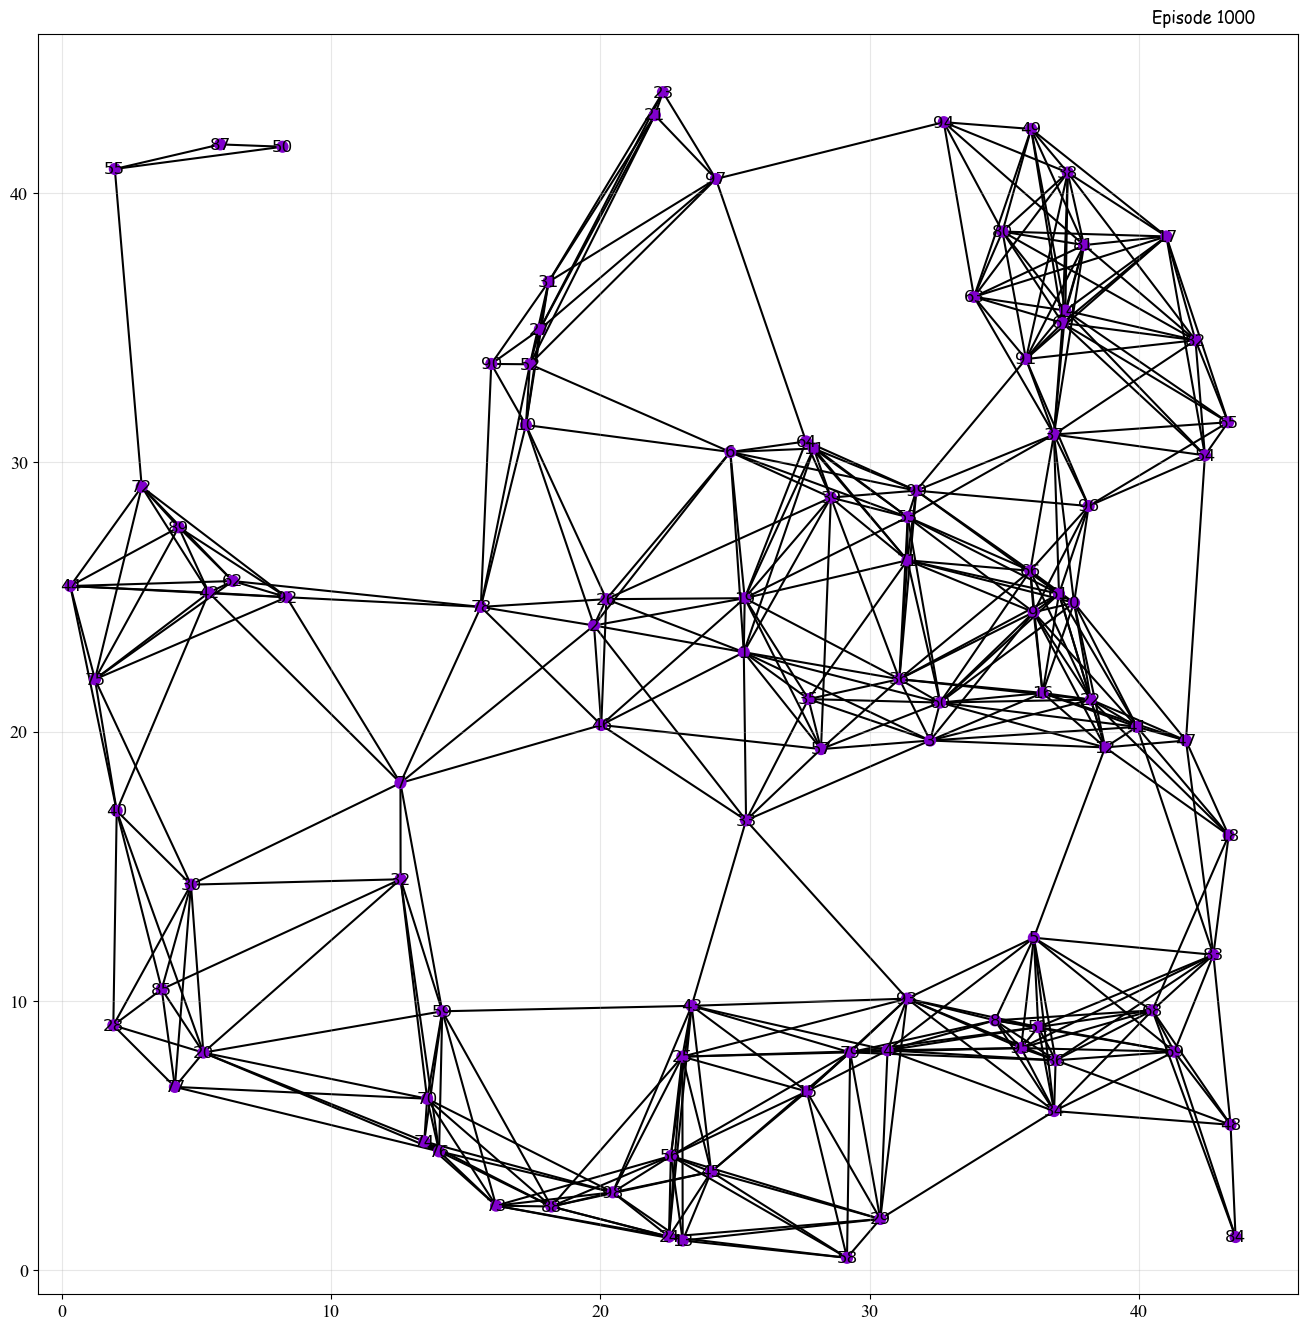

In [18]:
excel_path = "30 Particle MT , lr=1e-5 , alpha4=-1000 , L=45_.xlsx"
excel_sheet = "Send Request"
on_off = []
seed = 30
output_name = "o.gif"

Analysis.Make_Animation(excel_path, excel_sheet, ENV_Parameters, Parameters, on_off, seed, output_name)

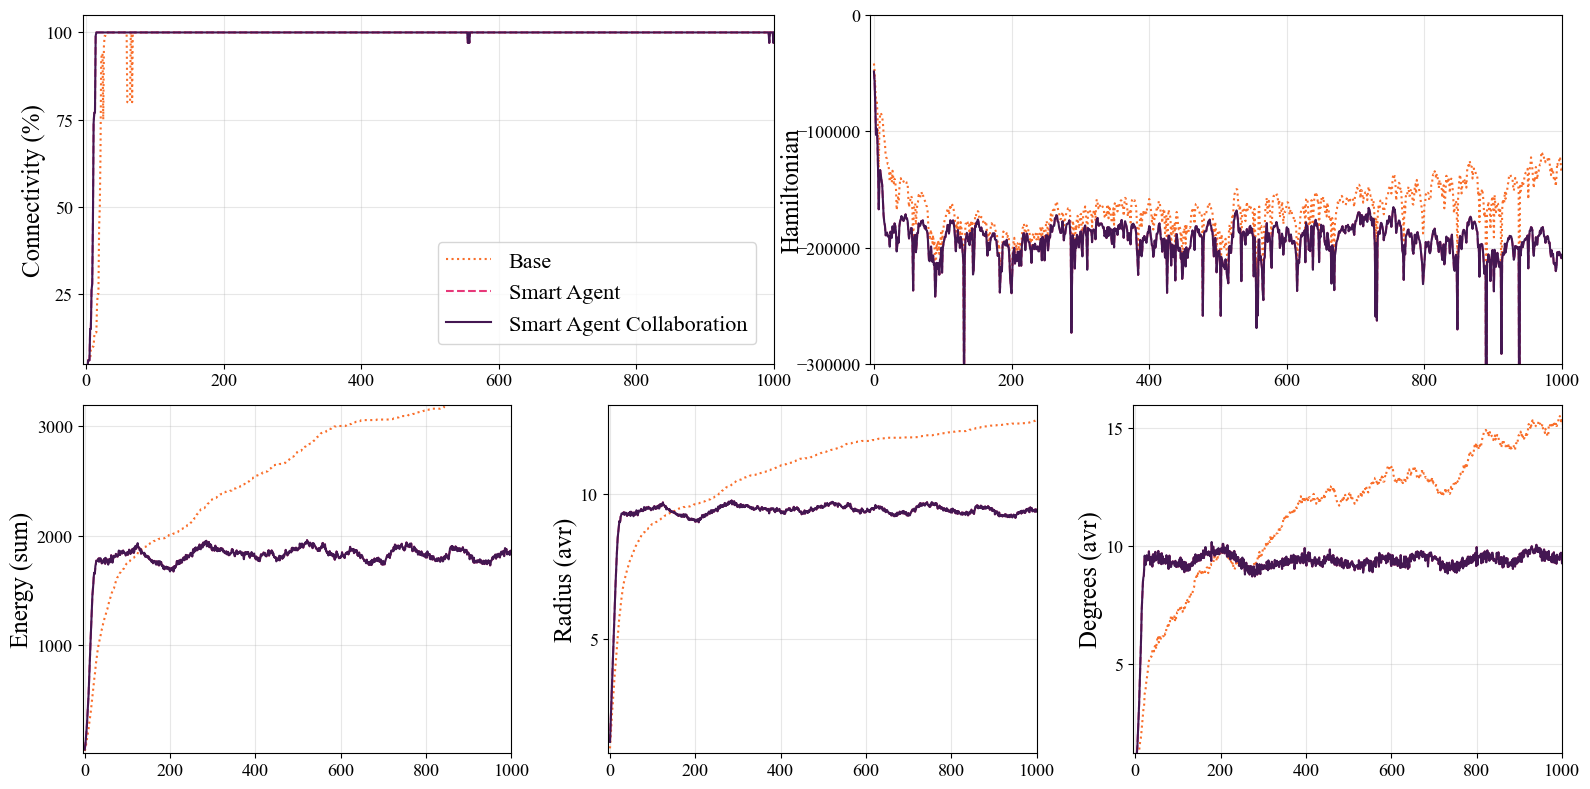

In [71]:
excel_name = "30 Averaged MT , lr=1e-5 , alpha4=-1000 , L=45____.xlsx"
sheet_name = 'Ensemble'
output_name = "o.png"


figsize  = (16, 8)
raw_col  = (2 , 6)
labelpad = [0, -6, 2, 2, 2]
ylim     = [[5, 105], [-300000, 0], [10, 3200], [1.05, 13.1], [1.2, 15.99]]  # s
legend   = ['Base', 'Smart Agent', 'Smart Agent Collaboration']
bbox_to_anchor = (0.5, 0., 0.49, 0.38)

figure_feature = [figsize, raw_col, labelpad, ylim, legend, bbox_to_anchor]


importlib.reload(Analysis)
Analysis.Ploting(excel_name, sheet_name, figure_feature, output_name)

# Test

In [103]:
import pandas as pd

excel_name  = "30 Averaged MT , lr=1e-5 , alpha4=-1000 , L=45_.xlsx"
sheets_name = pd.ExcelFile(excel_name).sheet_names

excel_base = pd.read_excel(excel_name, sheets_name[0])
excel_mode = pd.read_excel(excel_name, sheets_name[1])
excel_requ = pd.read_excel(excel_name, sheets_name[2])
excel_ensemble = pd.concat([excel_base, excel_mode.iloc[:, 1:], excel_requ.iloc[:, 1:]], axis=1)
# excel_ensemble.rename(excel_ensemble.columns[1:].to_list().insert(0, 'aa'))

# writer = pd.ExcelWriter("30 Averaged MT , lr=1e-5 , alpha4=-1000 , L=45____.xlsx", engine='openpyxl')
# excel_base.to_excel(writer, sheet_name=sheets_name[0], index=False)
# excel_mode.to_excel(writer, sheet_name=sheets_name[1], index=False)
# excel_requ.to_excel(writer, sheet_name=sheets_name[2], index=False)
# excel_ensemble.to_excel(writer, sheet_name='Ensemble', index=False)
# writer.close()

